In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
df= pd.read_csv("Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
X = df.drop(columns=["Performance Index"])
y = df["Performance Index"]
y

,Performance Index
0,91.0
1,65.0
2,45.0
3,36.0
4,66.0
...,...
9995,23.0
9996,58.0
9997,74.0
9998,95.0


In [ ]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [ ]:
validation_accuracies = {}
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    val_acc = accuracy_score(y_val, knn.predict(X_val))
    validation_accuracies[k] = val_acc

In [ ]:
best_k = max(validation_accuracies, key=validation_accuracies.get)

In [ ]:
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)
y_test_pred = final_knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(final_knn, X_train, y_train, cv=kf)
cv_avg_accuracy = cv_scores.mean()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


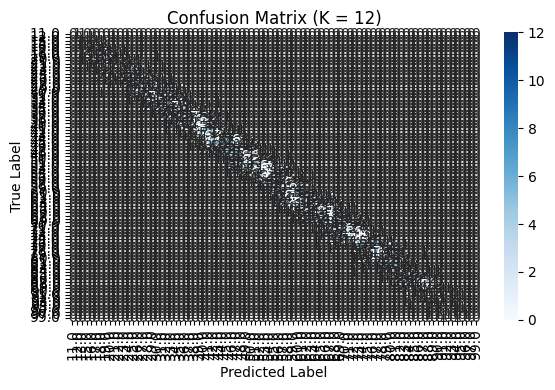

In [ ]:

unique_labels = sorted(y_test.unique())
conf_mat = confusion_matrix(y_test, y_test_pred, labels=unique_labels)
class_report = classification_report(y_test, y_test_pred, labels=unique_labels, output_dict=True)


plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=unique_labels,
            yticklabels=unique_labels)
plt.title(f"Confusion Matrix (K = {best_k})")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


In [ ]:
best_k, test_accuracy, cv_avg_accuracy, class_report

(12,
 0.122,
 np.float64(0.10516666666666667),
 {'11.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 2.0},
  '12.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 5.0},
  '13.0': {'precision': 0.16666666666666666,
   'recall': 0.3333333333333333,
   'f1-score': 0.2222222222222222,
   'support': 3.0},
  '15.0': {'precision': 0.14285714285714285,
   'recall': 0.25,
   'f1-score': 0.18181818181818182,
   'support': 4.0},
  '16.0': {'precision': 0.2222222222222222,
   'recall': 0.5,
   'f1-score': 0.3076923076923077,
   'support': 4.0},
  '17.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 10.0},
  '18.0': {'precision': 0.10526315789473684,
   'recall': 0.16666666666666666,
   'f1-score': 0.12903225806451613,
   'support': 12.0},
  '19.0': {'precision': 0.1111111111111111,
   'recall': 0.09090909090909091,
   'f1-score': 0.1,
   'support': 11.0},
  '20.0': {'precision': 0.2857142857142857,
   'recall': 0.13333333333333333,
   'f1-score': 